##Importação do *dataset*

In [100]:
import pandas as pd

dados = pd.read_csv('pre-processed.csv')

#separação dos dados:
X = dados['preprocessed_news']
y = dados['label']
dados

,index,label,preprocessed_news
0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,fake,radialista americano fala sobre pt vendem ilus...
...,...,...,...
7195,7195,true,jornal britanico acao contra lula lava jato se...
7196,7196,true,temer diz acionou pf cade investigar aumentos ...
7197,7197,true,obstaculos politicos temer especialistas ouvid...
7198,7198,true,setembro boa noite aqui estao principais notic...


##Visualização da distribuição de classes no *dataset*

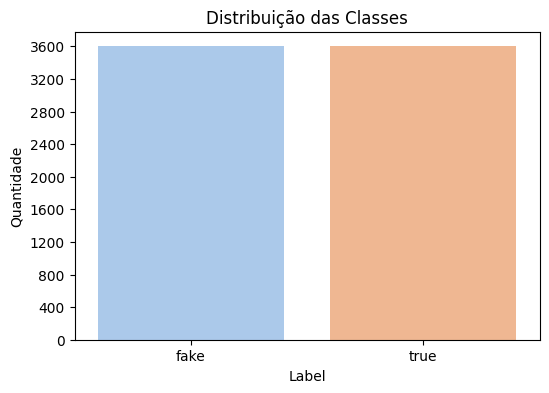

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
sns.countplot(x=y, hue=y, palette='pastel', legend=False)
plt.title("Distribuição das Classes")
plt.xlabel("Label")
plt.ylabel("Quantidade")
plt.yticks(np.arange(0, 3601, 400))
plt.show()

##Bibliotecas usadas:

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # naive_bayes
from sklearn.svm import LinearSVC # SVM
from sklearn.metrics import accuracy_score, confusion_matrix
import time # tempo de execução dos algoritmos

##Separação dos dados aleatoriamente, sendo 70% para treino e 30% para teste:

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13) #30% para teste

#1. K-nearest neighbors (KNN):

In [104]:
print("========= K-nearest neighbors (KNN) =========")

========= K-nearest neighbors (KNN) =========


## - Vetorização usada: *Bag-of-words*



In [105]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [106]:
start = time.time() #tempo do treino
knn_bag = KNeighborsClassifier(n_neighbors=3)
knn_bag.fit(X_train_bag, y_train)
treino_knn_bow = time.time() - start #tempo do treino

Teste (Predição):

In [107]:
start = time.time() #tempo do teste
y_pred_bag = knn_bag.predict(X_test_bag)
teste_knn_bow = time.time() - start #tempo do teste

Acurácia:

In [108]:
#calcular acuracia:
acuracia_knn_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do KNN usando bag-of-words:", acuracia_knn_bow)

Acurácia do KNN usando bag-of-words: 0.7046296296296296


Matriz de confusão:

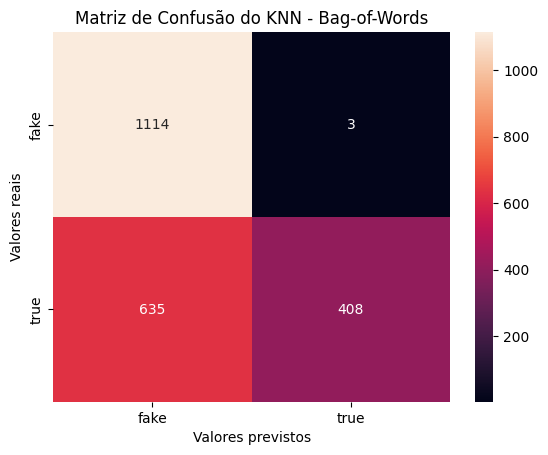

In [109]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=knn_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=knn_bag.classes_, yticklabels=knn_bag.classes_)
plt.title("Matriz de Confusão do KNN - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [110]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [111]:
start = time.time() #tempo do treino
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train_tfidf, y_train)
treino_knn_tfidf = time.time() - start #tempo do treino

Teste:

In [112]:
start = time.time() #tempo do teste
y_pred_tfidf = knn_tfidf.predict(X_test_tfidf)
teste_knn_tfidf = time.time() - start #tempo do teste

Acurácia:

In [113]:
#calcular acuracia:
acuracia_knn_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do KNN usando TF-IDF:", acuracia_knn_tfidf)

Acurácia do KNN usando TF-IDF: 0.6893518518518519


Matriz de confusão:

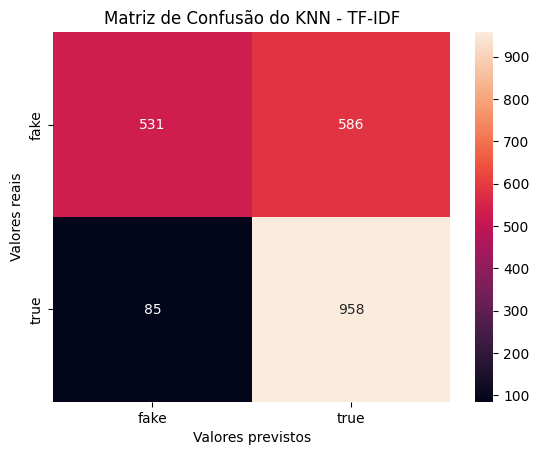

In [114]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=knn_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=knn_tfidf.classes_, yticklabels=knn_tfidf.classes_)
plt.title("Matriz de Confusão do KNN - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

#2. Naive Bayes:

In [115]:
print("============= Naive Bayes =============")

============= Naive Bayes =============


## - Vetorização usada: *Bag-of-words*

In [116]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [117]:
start = time.time() #tempo de treino
nb_bag = MultinomialNB()
nb_bag.fit(X_train_bag, y_train)
treino_nb_bow = time.time() - start #tempo do treino

Teste:

In [118]:
start = time.time() #tempo do teste
y_pred_bag = nb_bag.predict(X_test_bag)
teste_nb_bow = time.time() - start #tempo do teste

Acurácia:

In [119]:
#calcular acuracia:
acuracia_nb_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do Naive Bayes usando bag-of-words:", acuracia_nb_bow)

Acurácia do Naive Bayes usando bag-of-words: 0.8199074074074074


Matriz de confusão:

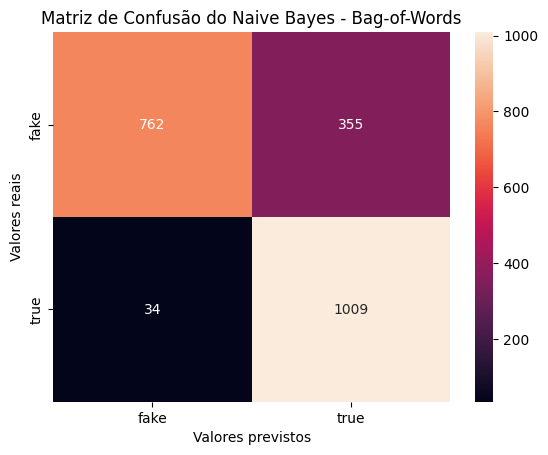

In [120]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=nb_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=nb_bag.classes_, yticklabels=nb_bag.classes_)
plt.title("Matriz de Confusão do Naive Bayes - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [121]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [122]:
start = time.time() #tempo de treino
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
treino_nb_tfidf = time.time() - start #tempo do treino

Teste:

In [123]:
start = time.time() #tempo de teste
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
teste_nb_tfidf = time.time() - start #tempo do teste

Acurácia:

In [124]:
#calcular acuracia:
acuracia_nb_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do Naive Bayes usando TF-IDF:", acuracia_nb_tfidf)

Acurácia do Naive Bayes usando TF-IDF: 0.5925925925925926


Matriz de confusão:

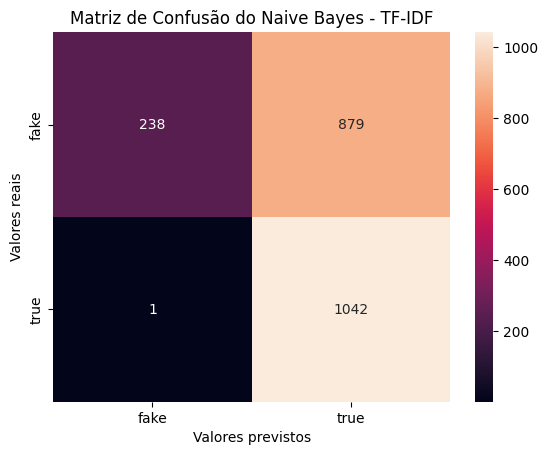

In [125]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=nb_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=nb_tfidf.classes_, yticklabels=nb_tfidf.classes_)
plt.title("Matriz de Confusão do Naive Bayes - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

#3. Support Vector Machine (SVM)

In [126]:
print("============= SVM =============")

============= SVM =============


## - Vetorização usada: *Bag-of-words*

In [127]:
# usando bag of words
bag_vetor = CountVectorizer()
X_train_bag = bag_vetor.fit_transform(X_train)
X_test_bag = bag_vetor.transform(X_test)

Treino:

In [128]:
start = time.time() #tempo do treino
svm_bag = LinearSVC()
svm_bag.fit(X_train_bag, y_train)
treino_svm_bow = time.time() - start #tempo do treino

Teste:

In [129]:
start = time.time() #tempo do teste
y_pred_bag = svm_bag.predict(X_test_bag)
teste_svm_bow = time.time() - start #tempo do teste

Acurácia:

In [130]:
#calcular acuracia:
acuracia_svm_bow = accuracy_score(y_test, y_pred_bag)
print("Acurácia do SVM usando bag-of-words:", acuracia_svm_bow)

Acurácia do SVM usando bag-of-words: 0.9574074074074074


Matriz de confusão:

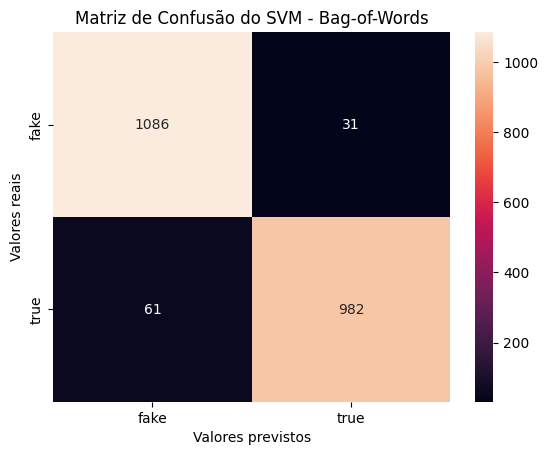

In [131]:
#matriz de confusão
mc_bag = confusion_matrix(y_test, y_pred_bag, labels=svm_bag.classes_)
sns.heatmap(mc_bag, annot=True, fmt="d", xticklabels=svm_bag.classes_, yticklabels=svm_bag.classes_)
plt.title("Matriz de Confusão do SVM - Bag-of-Words")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

## - Vetorização usada: TF-IDF

In [132]:
#usando TF-IDF
tfidf_vetor = TfidfVectorizer()
X_train_tfidf = tfidf_vetor.fit_transform(X_train)
X_test_tfidf = tfidf_vetor.transform(X_test)

Treino:

In [133]:
start = time.time() #tempo do treino
svm_tfidf = LinearSVC()
treino_svm_tfidf = time.time() - start #tempo do treino

Teste:

In [134]:
svm_tfidf.fit(X_train_tfidf, y_train)
start = time.time() #tempo do teste
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
teste_svm_tfidf = time.time() - start #tempo do teste

Acurácia:

In [135]:
#calcular acuracia:
acuracia_svm_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Acurácia do SVM usando TF-IDF:", acuracia_svm_tfidf)

Acurácia do SVM usando TF-IDF: 0.9574074074074074


Matriz de confusão:

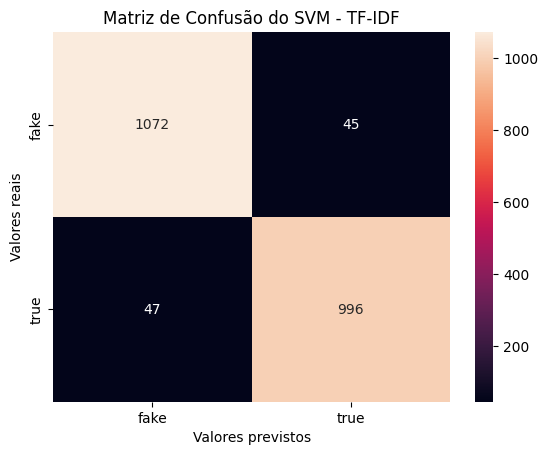

In [136]:
#matriz de confusão
mc_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=svm_tfidf.classes_)
sns.heatmap(mc_tfidf, annot=True, fmt="d", xticklabels=svm_tfidf.classes_, yticklabels=svm_tfidf.classes_)
plt.title("Matriz de Confusão do SVM - TF-IDF")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

# 4. BERT (Bidirectional Encoder Representations from Transformers)

In [137]:
print("============= BERT =============")

============= BERT =============


### ⚠️ Aviso:

Devido a problemas de compatibilidade com versões mais novas do TensorFlow, foi utilizado uma versão mais antiga.  
A biblioteca Pytorch (criada e mantida pela Meta) seria mais recomendado nesse caso

Um dos avisos dados:
> TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.

Além disso, eu pessoalmente recomendo rodar o BERT após o resto dos modelos, devido ao uso do Keras em uma versão anterior

### Configuração de ambiente para o BERT

In [138]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time
import os
import pickle

In [139]:
# --- Configuração Inicial e Carregamento de Dados ---
print("Carregando o arquivo pre-processed.csv...")
dados = pd.read_csv('pre-processed.csv')

X = dados['preprocessed_news'].astype(str).tolist()
y = dados['label'].tolist()

# Codificar os labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=13)
print(f"Dataset dividido em: {len(X_train)} amostras de treino e {len(X_test)} amostras de teste.")

Carregando o arquivo pre-processed.csv...
Dataset dividido em: 5040 amostras de treino e 2160 amostras de teste.


In [140]:
# Carregar tokenizer do BERT
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

In [141]:
# Função para tokenizar textos
def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'  # Retorna tensores do PyTorch
    )

# Tokenizar dados
train_encodings = encode_texts(X_train, tokenizer)
test_encodings = encode_texts(X_test, tokenizer)

In [142]:
# Criar datasets PyTorch
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(y_test))

train_size = int(0.7 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16) # Add val_loader
test_loader = DataLoader(test_dataset, batch_size=16)

In [143]:
# Construir modelo BERT + classificação com PyTorch
class BertClassifier(torch.nn.Module):
    def __init__(self, bert_model_name):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # [CLS] token
        logits = self.classifier(cls_output)
        return torch.sigmoid(logits)

model = BertClassifier('bert-base-multilingual-cased')

In [144]:
# Otimizador e função de perda
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
loss_fn = torch.nn.BCELoss() # Binary Cross-Entropy Loss

# Mover modelo para a GPU se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [145]:
print("Iniciando o treinamento do modelo BERT (PyTorch)...")
start_time_train = time.time()

epochs = 5
history = {'train_loss': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    print(f"--- Época {epoch + 1}/{epochs} ---")

    # Treinamento
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask).squeeze()
        loss = loss_fn(outputs, labels.float())
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    history['train_loss'].append(avg_train_loss)

    # Validação
    model.eval()
    all_labels = []
    all_preds = []
    total_val_loss = 0
    total_val_correct = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]

            outputs = model(input_ids, attention_mask).squeeze()
            loss = loss_fn(outputs, labels.float())
            total_val_loss += loss.item()

            preds = (outputs > 0.5).int()
            total_val_correct += (preds == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = total_val_correct / len(val_dataset)
    history['val_loss'].append(avg_val_loss)
    history['val_accuracy'].append(val_accuracy)

    print(f"Perda de Treino: {avg_train_loss:.4f} | Perda de Validação: {avg_val_loss:.4f} | Acurácia de Validação: {val_accuracy:.4f}")

end_time_train = time.time()
treino_bert = end_time_train - start_time_train
acuracia_bert = accuracy_score(all_labels, all_preds)
print("Acurácia do BERT:", acuracia_bert)
print(f"\nTempo total de treino do BERT: {treino_bert:.2f} segundos")

Iniciando o treinamento do modelo BERT (PyTorch)...
--- Época 1/5 ---


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Perda de Treino: 0.6924 | Perda de Validação: 0.6299 | Acurácia de Validação: 0.5893
--- Época 2/5 ---
Perda de Treino: 0.4623 | Perda de Validação: 0.4721 | Acurácia de Validação: 0.7870
--- Época 3/5 ---
Perda de Treino: 0.2682 | Perda de Validação: 0.5092 | Acurácia de Validação: 0.8161
--- Época 4/5 ---
Perda de Treino: 0.1765 | Perda de Validação: 0.4829 | Acurácia de Validação: 0.8300
--- Época 5/5 ---
Perda de Treino: 0.0944 | Perda de Validação: 0.4005 | Acurácia de Validação: 0.8730
Acurácia do BERT: 0.873015873015873

Tempo total de treino do BERT: 456.74 segundos


In [146]:
# Salvando o modelo
if not os.path.exists('modelos'):
    os.makedirs('modelos')

model_save_path = 'modelos/bert_pytorch_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Salvando o modelo BERT (PyTorch) em {model_save_path}")

# --- Salvar o Tokenizer ---
tokenizer_save_path = 'modelos/bert_tokenizer/'
tokenizer.save_pretrained(tokenizer_save_path)
print(f"Salvando o tokenizer em {tokenizer_save_path}")

# --- Salvar o Label Encoder ---
le_save_path = 'modelos/label_encoder.pkl'
with open(le_save_path, 'wb') as f:
    pickle.dump(le, f)
print(f"Salvando o Label Encoder em {le_save_path}")

Salvando o modelo BERT (PyTorch) em modelos/bert_pytorch_model.pth
Salvando o tokenizer em modelos/bert_tokenizer/
Salvando o Label Encoder em modelos/label_encoder.pkl


Gerando a matriz de confusão para o modelo BERT (PyTorch)...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


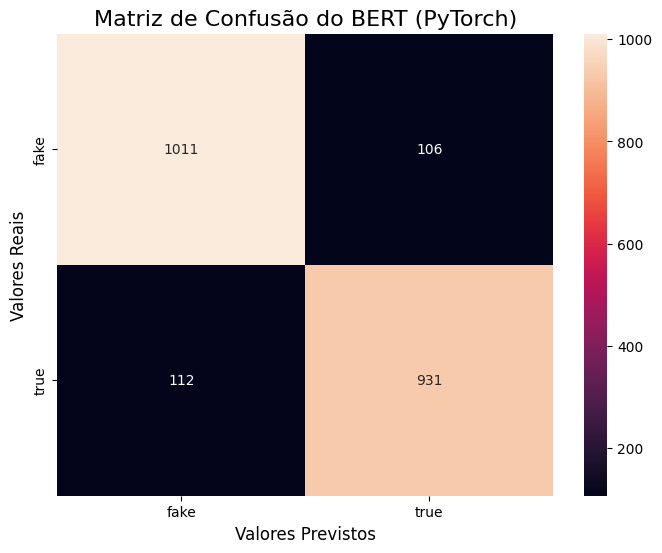

In [147]:
# --- Predições e Matriz de Confusão ---
print("Gerando a matriz de confusão para o modelo BERT (PyTorch)...")

model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask).squeeze()
        preds = (outputs > 0.5).int()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

mc_bert_pytorch = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(mc_bert_pytorch,
            annot=True,
            fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Matriz de Confusão do BERT (PyTorch)", fontsize=16)
plt.xlabel("Valores Previstos", fontsize=12)
plt.ylabel("Valores Reais", fontsize=12)
plt.show()

#Gráfico de Comparação de Acurácia entre Modelos usados

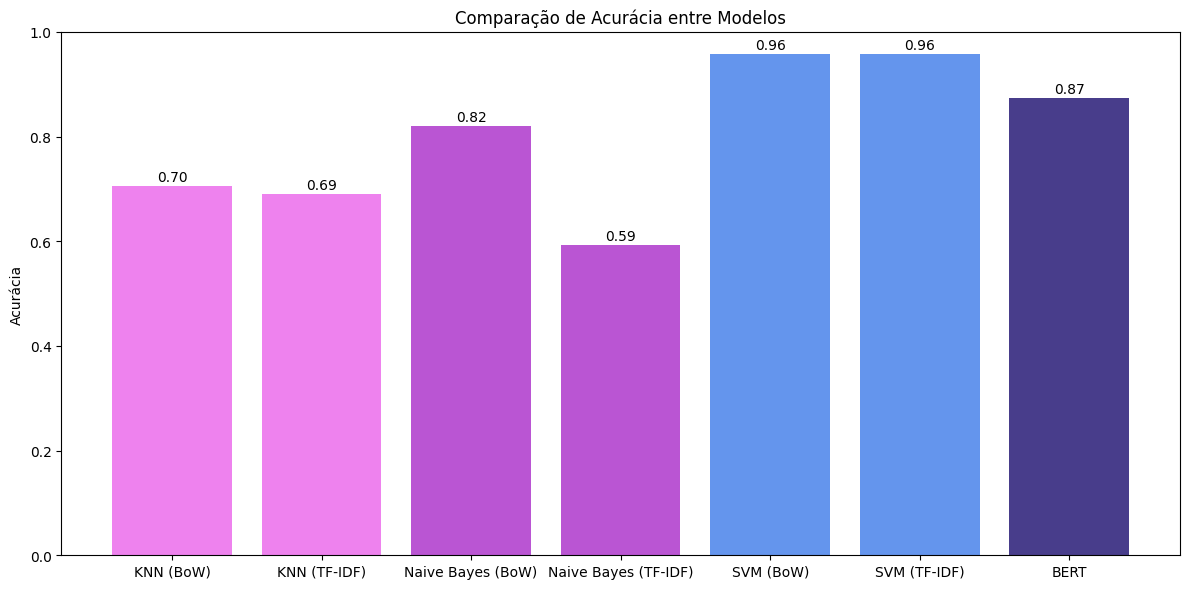

In [148]:
acuracias = {
  'KNN (BoW)': acuracia_knn_bow,
  'KNN (TF-IDF)': acuracia_knn_tfidf,
  'Naive Bayes (BoW)': acuracia_nb_bow,
  'Naive Bayes (TF-IDF)': acuracia_nb_tfidf,
  'SVM (BoW)': acuracia_svm_bow,
  'SVM (TF-IDF)': acuracia_svm_tfidf,
  'BERT': acuracia_bert
}

cores = []
for modelo in acuracias.keys():
  if 'KNN' in modelo:
    cores.append('violet')   # rosa
  elif 'Naive Bayes' in modelo:
    cores.append('mediumorchid')  # roxo
  elif 'SVM' in modelo:
    cores.append('cornflowerblue')  # azul
  elif 'BERT' in modelo:
    cores.append('darkslateblue') # roxo escuro

plt.figure(figsize=(12, 6))
plt.bar(acuracias.keys(), acuracias.values(), color=cores)
plt.title('Comparação de Acurácia entre Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1.0)

#valores no topo das barras:
for i, (modelo, valor) in enumerate(acuracias.items()):
  plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#Gráfico de comparação de tempos de execução entre modelos:

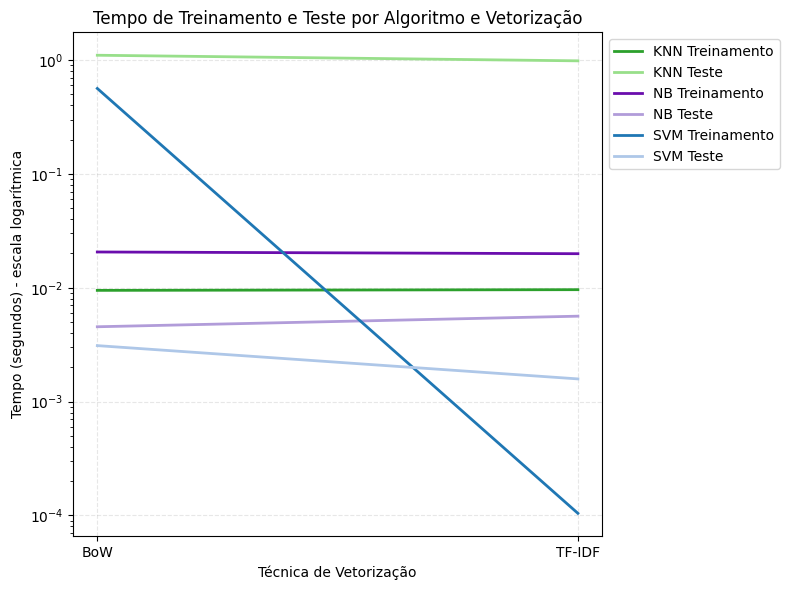

In [149]:
import matplotlib.pyplot as plt
import numpy as np

tecnicas = ['BoW', 'TF-IDF']
x = np.arange(len(tecnicas))

treino_nb = [treino_nb_bow, treino_nb_tfidf]
teste_nb = [teste_nb_bow, teste_nb_tfidf]

treino_knn = [treino_knn_bow, treino_knn_tfidf]
teste_knn = [teste_knn_bow, teste_knn_tfidf]

treino_svm = [treino_svm_bow, treino_svm_tfidf]
teste_svm = [teste_svm_bow, teste_svm_tfidf]

plt.figure(figsize=(10, 6))

plt.plot(x, treino_knn, label='KNN Treinamento', color='#2ca02c', linewidth=2) # verde
plt.plot(x, teste_knn, label='KNN Teste', color='#98df8a', linewidth=2)        # verde claro

plt.plot(x, treino_nb, label='NB Treinamento', color='#6a0dad', linewidth=2)   # roxo escuro
plt.plot(x, teste_nb, label='NB Teste',color='#b19cd9', linewidth=2)          # roxo claro

plt.plot(x, treino_svm, label='SVM Treinamento', color='#1f77b4', linewidth=2) # azul
plt.plot(x, teste_svm, label='SVM Teste', color='#aec7e8', linewidth=2)        # azul claro

plt.xticks(x, tecnicas)
plt.xlabel('Técnica de Vetorização')
plt.ylabel('Tempo (segundos) - escala logarítmica')
plt.title('Tempo de Treinamento e Teste por Algoritmo e Vetorização')

plt.grid(True, linestyle='--', alpha=0.3)

plt.yscale('log')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

## Exportação dos melhores modelos de cada método

In [150]:
import pickle
import os

if not os.path.exists('modelos'):
    os.makedirs('modelos')

best_models = {}

best_models['KNN'] = {'model': knn_bag, 'vectorizer': bag_vetor, 'accuracy': acuracias['KNN (BoW)']}
best_models['Naive Bayes'] = {'model': nb_bag, 'vectorizer': bag_vetor, 'accuracy': acuracias['Naive Bayes (BoW)']}
best_models['SVM'] = {'model': svm_tfidf, 'vectorizer': tfidf_vetor, 'accuracy': acuracias['SVM (TF-IDF)']}

for model_name, model_info in best_models.items():
    model_filename = f'modelos/{model_name.lower().replace(" ", "_")}_model.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(model_info['model'], f)
    print(f"Salvando modelo {model_name} em {model_filename}")

    vectorizer_filename = f'modelos/{model_name.lower().replace(" ", "_")}_vectorizer.pkl'
    with open(vectorizer_filename, 'wb') as f:
        pickle.dump(model_info['vectorizer'], f)
    print(f"Salvando {model_name} vetorizador em {vectorizer_filename}")

Salvando modelo KNN em modelos/knn_model.pkl
Salvando KNN vetorizador em modelos/knn_vectorizer.pkl
Salvando modelo Naive Bayes em modelos/naive_bayes_model.pkl
Salvando Naive Bayes vetorizador em modelos/naive_bayes_vectorizer.pkl
Salvando modelo SVM em modelos/svm_model.pkl
Salvando SVM vetorizador em modelos/svm_vectorizer.pkl


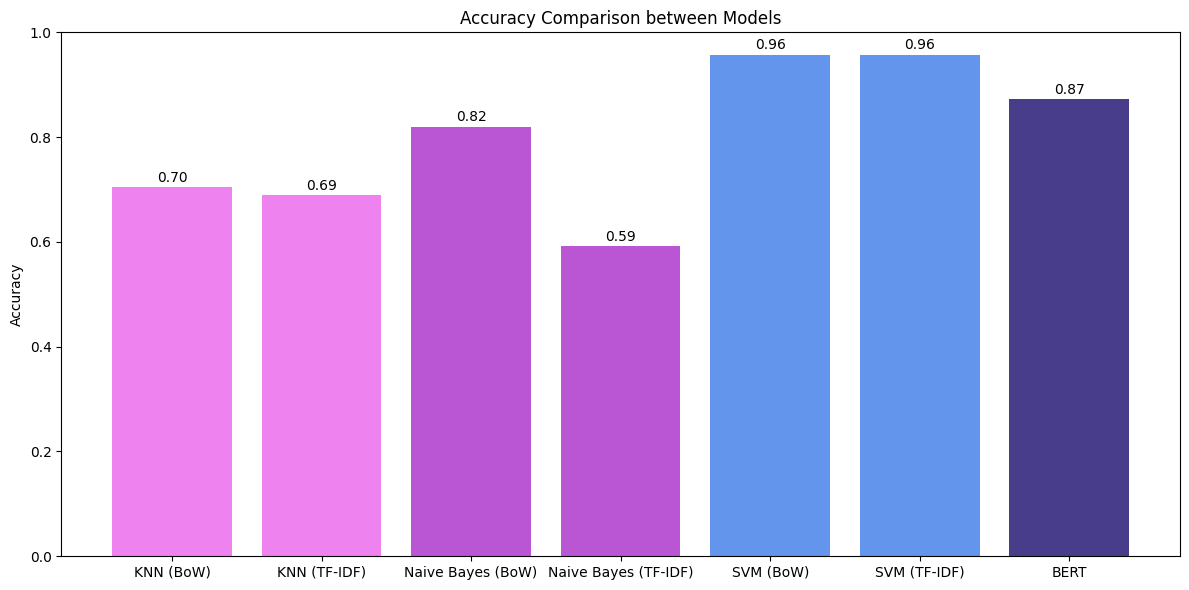

In [151]:
acuracias = {
  'KNN (BoW)': acuracia_knn_bow,
  'KNN (TF-IDF)': acuracia_knn_tfidf,
  'Naive Bayes (BoW)': acuracia_nb_bow,
  'Naive Bayes (TF-IDF)': acuracia_nb_tfidf,
  'SVM (BoW)': acuracia_svm_bow,
  'SVM (TF-IDF)': acuracia_svm_tfidf,
  'BERT': acuracia_bert
}

cores = []
for modelo in acuracias.keys():
  if 'KNN' in modelo:
    cores.append('violet')   # rosa
  elif 'Naive Bayes' in modelo:
    cores.append('mediumorchid')  # roxo
  elif 'SVM' in modelo:
    cores.append('cornflowerblue')  # azul
  elif 'BERT' in modelo:
    cores.append('darkslateblue') # roxo escuro

plt.figure(figsize=(12, 6))
plt.bar(acuracias.keys(), acuracias.values(), color=cores)
plt.title('Accuracy Comparison between Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

#valores no topo das barras:
for i, (modelo, valor) in enumerate(acuracias.items()):
  plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

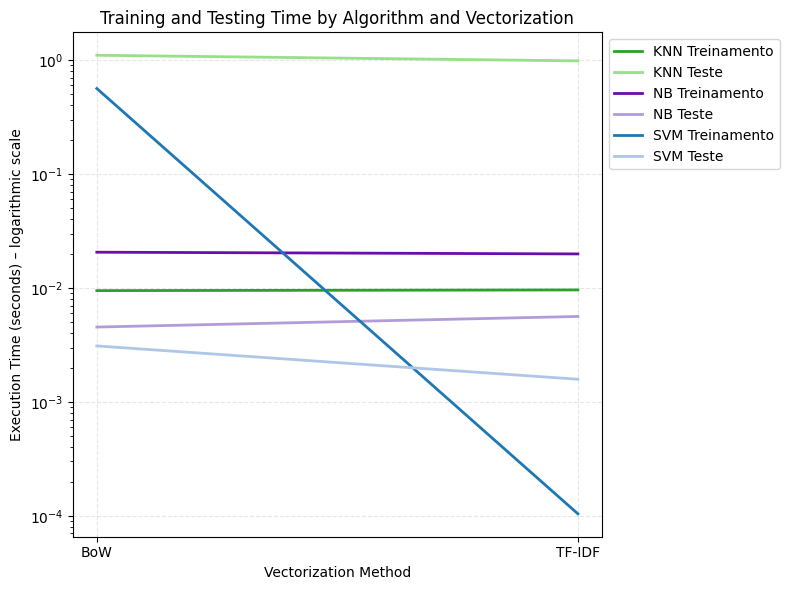

In [152]:
import matplotlib.pyplot as plt
import numpy as np

tecnicas = ['BoW', 'TF-IDF']
x = np.arange(len(tecnicas))

treino_nb = [treino_nb_bow, treino_nb_tfidf]
teste_nb = [teste_nb_bow, teste_nb_tfidf]

treino_knn = [treino_knn_bow, treino_knn_tfidf]
teste_knn = [teste_knn_bow, teste_knn_tfidf]

treino_svm = [treino_svm_bow, treino_svm_tfidf]
teste_svm = [teste_svm_bow, teste_svm_tfidf]

plt.figure(figsize=(10, 6))

plt.plot(x, treino_knn, label='KNN Treinamento', color='#2ca02c', linewidth=2) # verde
plt.plot(x, teste_knn, label='KNN Teste', color='#98df8a', linewidth=2)        # verde claro

plt.plot(x, treino_nb, label='NB Treinamento', color='#6a0dad', linewidth=2)   # roxo escuro
plt.plot(x, teste_nb, label='NB Teste',color='#b19cd9', linewidth=2)          # roxo claro

plt.plot(x, treino_svm, label='SVM Treinamento', color='#1f77b4', linewidth=2) # azul
plt.plot(x, teste_svm, label='SVM Teste', color='#aec7e8', linewidth=2)        # azul claro

plt.xticks(x, tecnicas)
plt.xlabel('Vectorization Method')
plt.ylabel('Execution Time (seconds) – logarithmic scale')
plt.title('Training and Testing Time by Algorithm and Vectorization')

plt.grid(True, linestyle='--', alpha=0.3)

plt.yscale('log')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()